<a href="https://colab.research.google.com/github/faridahamid/Codsoft-Data-Science-Intern/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/advertising.csv")
data.shape

(200, 4)

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

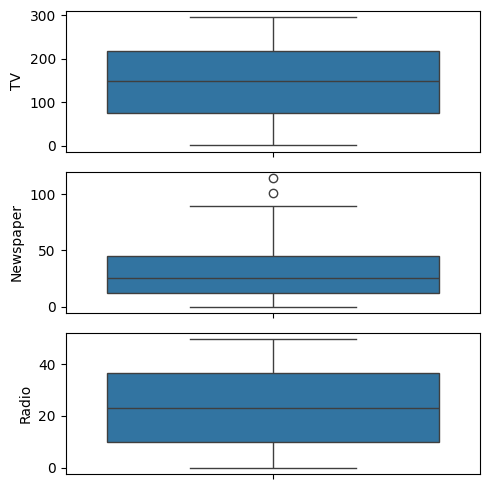

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

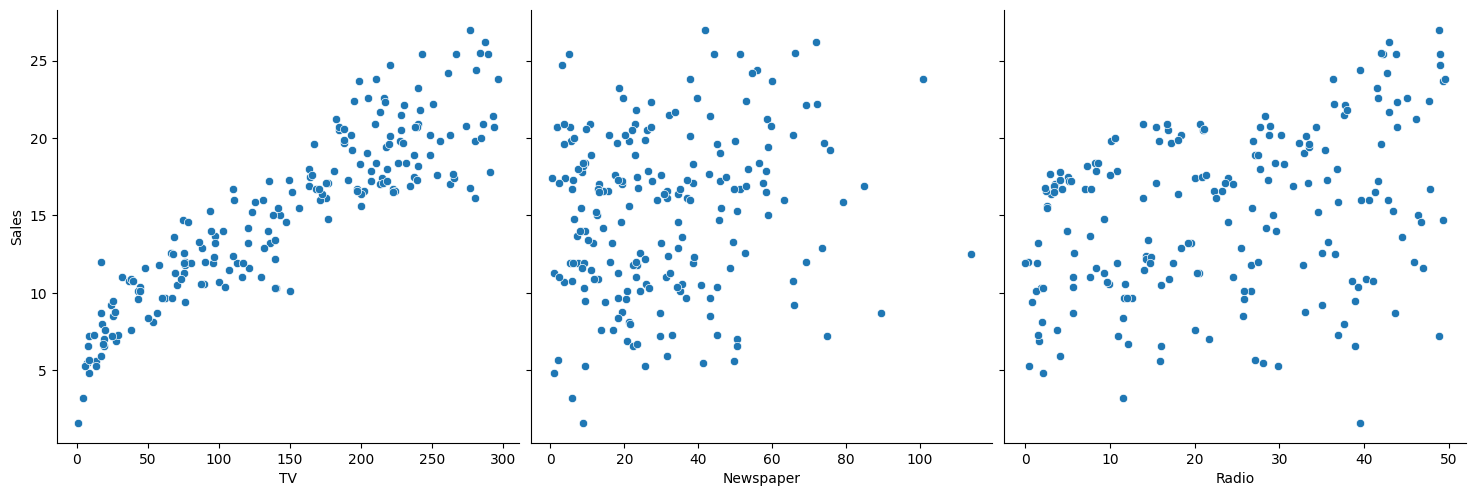

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.show()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


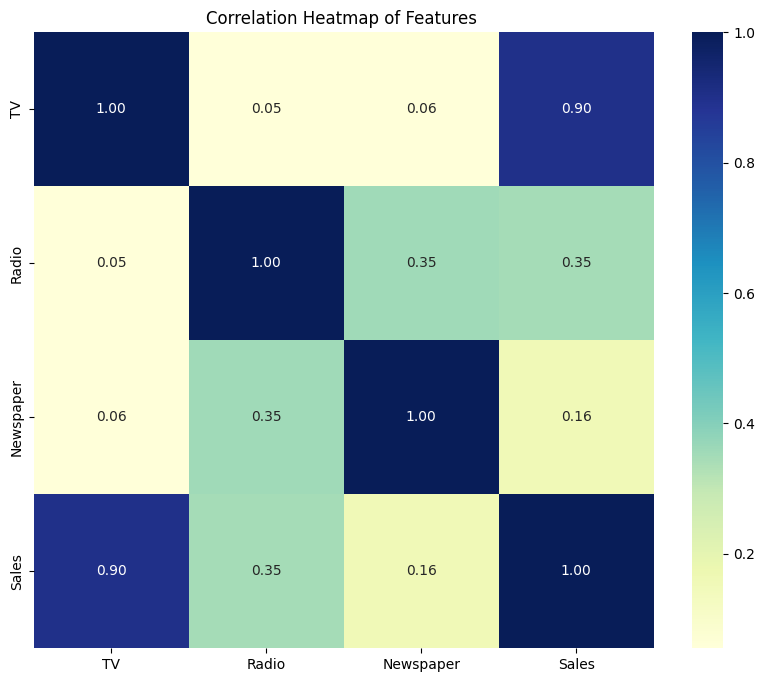

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
print(data.corr())
plt.title('Correlation Heatmap of Features ')
plt.show()

In [ ]:
X = data.drop('Sales', axis=1)
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("prediction:", y_pred)



prediction: [17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test_multiclass = le.fit_transform(y_test)


reg = LogisticRegression(random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("prediction:", y_pred)


prediction: [94 53 83  6 86 33 97 20 58 83 49 19 30  0 68 68  6 86 33 86 94  5 17 94
 86 30 97 86 94 17 79 53 53  4 79 86 17 57 86 30]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = accuracy_score(y_test_multiclass, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.025


In [ ]:
f = RandomForestClassifier(random_state=42)
f.fit(X_train, y_train)
y_pred = f.predict(X_test)
print("prediction:", y_pred)

prediction: [64 57 97  6 77 40 92 19 56 56  1 37 75  0 21 54  6 59 23 87 75 52 17 91
 25 37 92 29 19 86 54 11 48 33 79 79  0 96 25 10]


In [ ]:
accuracy = accuracy_score(y_test_multiclass, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.025


In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("prediction:", y_pred)
accuracy = accuracy_score(y_test_multiclass, y_pred)
print("Accuracy:", accuracy)

prediction: [64 75 83  6 94 40 92 20 57 60 25 20 64  0 34 68  6 59 38 86 83 41 11 95
 25 20 92 45 33 25 54 33 75  9 86 93 17 83 26 14]
Accuracy: 0.025


In [ ]:


import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()
X_test_sm = sm.add_constant(X_test)
y_pred = results.predict(X_test_sm)
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     464.5
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.62e-77
Time:                        18:36:18   Log-Likelihood:                -573.64
No. Observations:                 160   AIC:                             1155.
Df Residuals:                     156   BIC:                             1168.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6056      1.876     -1.922      0.0